In [1]:
#!pip install pandas
#!pip install matplotlib
#!pip install datasist
#!pip install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = (15,15)
import statistics as stat

In [3]:
Cab = pd.read_csv("Cab_Data.csv")
Cab
Cab["Date of Travel"] = pd.to_datetime(Cab["Date of Travel"])
Cab

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [4]:
City = pd.read_csv("City.csv")
City

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247
5,ORANGE COUNTY,1030185,12994
6,SAN DIEGO CA,959307,69995
7,PHOENIX AZ,943999,6133
8,DALLAS TX,942908,22157
9,ATLANTA GA,814885,24701


In [5]:
Customer = pd.read_csv("Customer_ID.csv")
Customer

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28.0,10813
1,27703,Male,27.0,9237
2,28712,Male,53.0,11242
3,28020,Male,23.0,23327
4,27182,Male,33.0,8536
...,...,...,...,...
49166,12490,Male,33.0,18713
49167,14971,Male,30.0,15346
49168,41414,Male,38.0,3960
49169,41677,Male,23.0,19454


In [6]:
Transaction = pd.read_csv("Transaction_ID.csv")
Transaction

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


# Data Preparation

In [7]:
#Preparation for Cab Data
Cab.shape

(359392, 7)

In [8]:
Cab.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [9]:
#Preparation for City Data
City.shape

(20, 3)

In [10]:
City.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [11]:
#Preparation for Customer Data
Customer.shape

(49171, 4)

In [12]:
Customer.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [13]:
#Preparation for Transaction Data
Transaction.shape

(440098, 3)

### EDA FOR CAB DATA

In [14]:
import datasist as ds

In [15]:
Cab

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [16]:
Cab.shape

(359392, 7)

In [17]:
Cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB


In [18]:
ds.structdata.describe(Cab)

First five data points


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776




Random five data points


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
354205,10433406,2018-12-29,Pink Cab,LOS ANGELES CA,2.30,37.79,25.3000
246930,10302224,2018-02-17,Yellow Cab,CHICAGO IL,14.98,226.26,185.1528
44260,10055819,2016-07-22,Yellow Cab,NEW YORK NY,27.60,795.83,331.2000
126604,10155767,2017-03-14,Yellow Cab,WASHINGTON DC,22.47,443.54,307.3896
232849,10284693,2018-01-01,Pink Cab,LOS ANGELES CA,33.30,514.20,376.2900




Last five data points


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480
359391,10440107,2018-01-02,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192




Shape of  data set: (359392, 7)


Size of  data set: 2515744


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
Transaction ID,int64
Date of Travel,datetime64[ns]
Company,object
City,object
KM Travelled,float64
Price Charged,float64
Cost of Trip,float64




Column(s) {'Date of Travel'} should be in Datetime format. Use the [to_date] function in datasist.feature_engineering to convert to Pandas Datetime format


Numerical Features in Data set
['Transaction ID', 'KM Travelled', 'Price Charged', 'Cost of Trip']


Categorical Features in Data set


['Company', 'City']



Statistical Description of Columns


,Transaction ID,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113
std,1.268058e+05,12.233526,274.378911,157.993661
min,1.000001e+07,1.900000,15.600000,19.000000
25%,1.011081e+07,12.000000,206.437500,151.200000
50%,1.022104e+07,22.440000,386.360000,282.480000
75%,1.033094e+07,32.960000,583.660000,413.683200
max,1.044011e+07,48.000000,2048.030000,691.200000




Description of Categorical Features


,count,unique,top,freq
Company,359392,2,Yellow Cab,274681
City,359392,19,NEW YORK NY,99885




Unique class Count of Categorical features


,Feature,Unique Count
0,Company,2
1,City,19




Missing Values in Data


,features,missing_counts,missing_percent
0,Transaction ID,0,0.0
1,Date of Travel,0,0.0
2,Company,0,0.0
3,City,0,0.0
4,KM Travelled,0,0.0
5,Price Charged,0,0.0
6,Cost of Trip,0,0.0


In [19]:
Cab[['Price Charged', 'Cost of Trip']]

,Price Charged,Cost of Trip
0,370.95,313.6350
1,358.52,334.8540
2,125.20,97.6320
3,377.40,351.6020
4,114.62,97.7760
...,...,...
359387,69.24,63.3600
359388,113.75,106.8480
359389,437.07,349.6500
359390,146.19,114.0480


In [20]:
Cab.tail()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480
359391,10440107,2018-01-02,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192


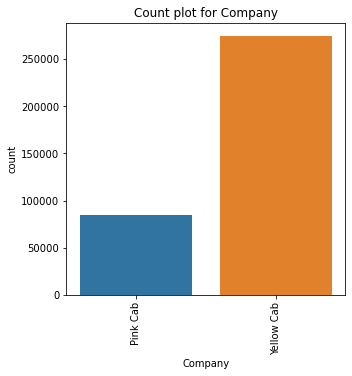

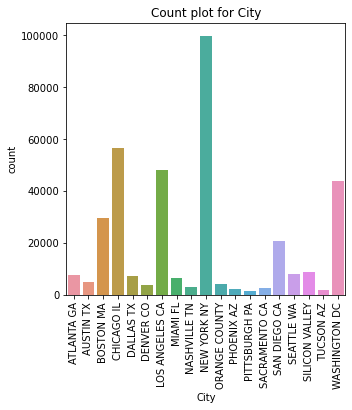

In [21]:
ds.visualizations.countplot(Cab)

<Figure size 16000x16000 with 0 Axes>

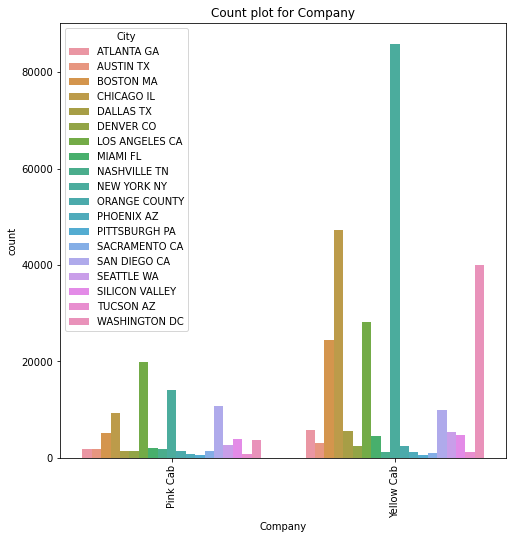

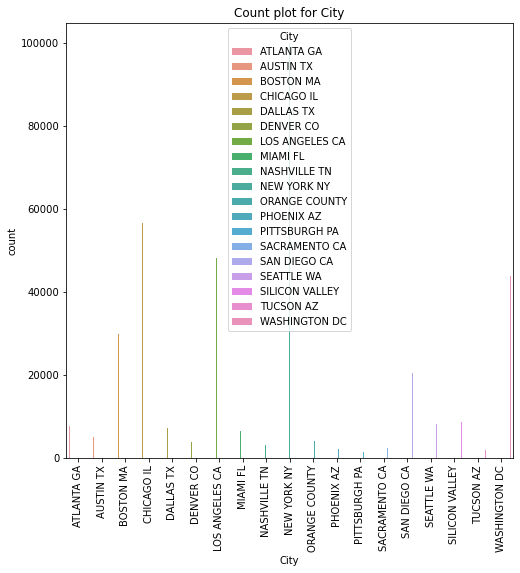

In [22]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 20), dpi=800, facecolor='w', edgecolor='k')
ds.visualizations.countplot(Cab, separate_by='City',fig_size=(8,8))

### outlier removal

In [23]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 20), dpi=800, facecolor='w', edgecolor='k')

<Figure size 16000x16000 with 0 Axes>

<Figure size 16000x16000 with 0 Axes>

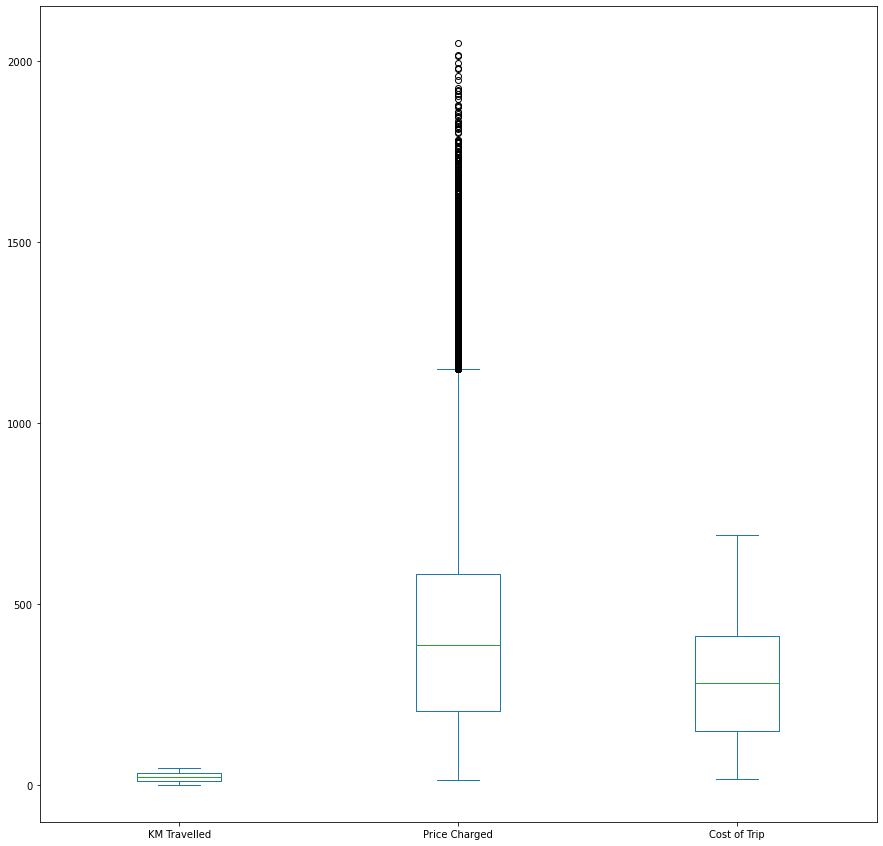

In [24]:
Cab_outliers = Cab[["KM Travelled", "Price Charged","Cost of Trip"]]
Cab_outliers
Cab_outliers.plot(kind='box')
plt.show()



### EDA FOR CITY DATA

In [25]:
City

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247
5,ORANGE COUNTY,1030185,12994
6,SAN DIEGO CA,959307,69995
7,PHOENIX AZ,943999,6133
8,DALLAS TX,942908,22157
9,ATLANTA GA,814885,24701


In [26]:
ds.structdata.describe(City)

First five data points


,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247




Random five data points


,City,Population,Users
0,NEW YORK NY,8405837,302149
16,PITTSBURGH PA,542085,3643
7,PHOENIX AZ,943999,6133
12,SEATTLE WA,671238,25063
14,SAN FRANCISCO CA,629591,213609




Last five data points


,City,Population,Users
15,SACRAMENTO CA,545776,7044
16,PITTSBURGH PA,542085,3643
17,WASHINGTON DC,418859,127001
18,NASHVILLE TN,327225,9270
19,BOSTON MA,248968,80021




Shape of  data set: (20, 3)


Size of  data set: 60


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
City,object
Population,int64
Users,int64




Numerical Features in Data set
['Population', 'Users']


Categorical Features in Data set


['City']



Statistical Description of Columns


,Population,Users
count,2.000000e+01,20.000000
mean,1.231592e+06,64520.650000
std,1.740127e+06,83499.375289
min,2.489680e+05,3643.000000
25%,6.086372e+05,11633.250000
50%,7.845590e+05,23429.000000
75%,1.067041e+06,91766.000000
max,8.405837e+06,302149.000000




Description of Categorical Features


,count,unique,top,freq
City,20,20,NEW YORK NY,1




Unique class Count of Categorical features


,Feature,Unique Count
0,City,20




Missing Values in Data


,features,missing_counts,missing_percent
0,City,0,0.0
1,Population,0,0.0
2,Users,0,0.0


In [27]:
City.tail()
City.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

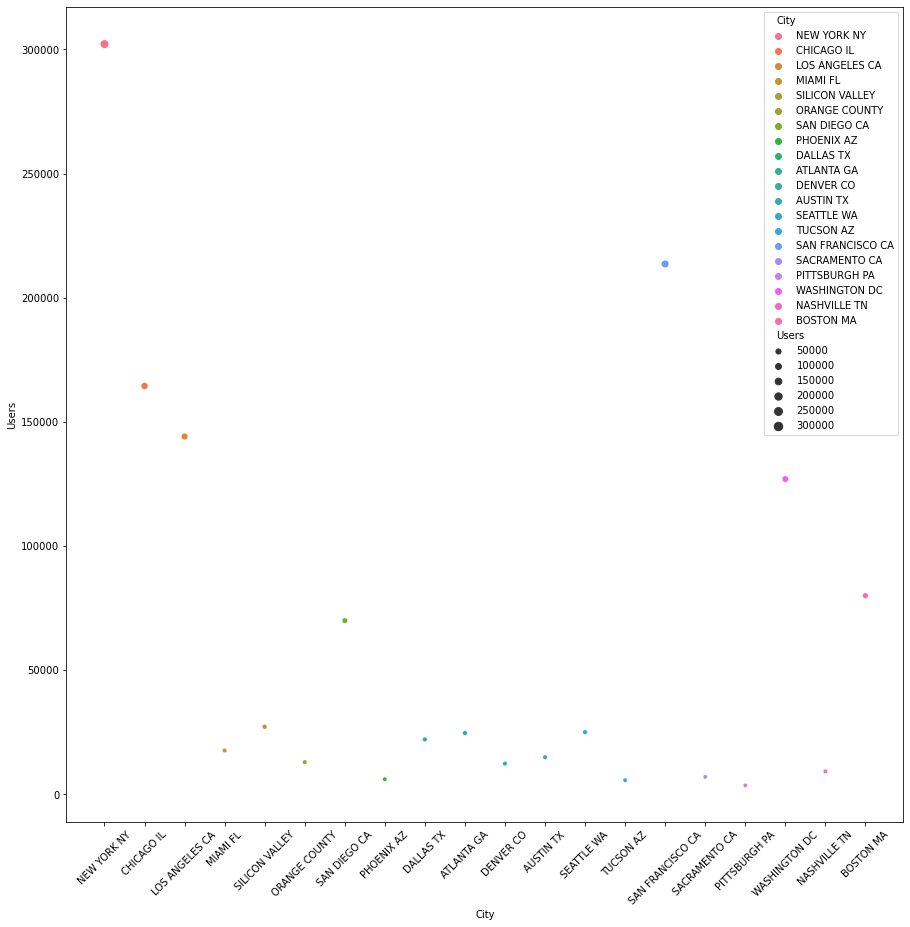

In [28]:
City.sort_values(by=['Population', 'Users'])
sns.scatterplot(data=City, x="City", y="Users", hue="City", size="Users")
plt.xticks(rotation=45)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

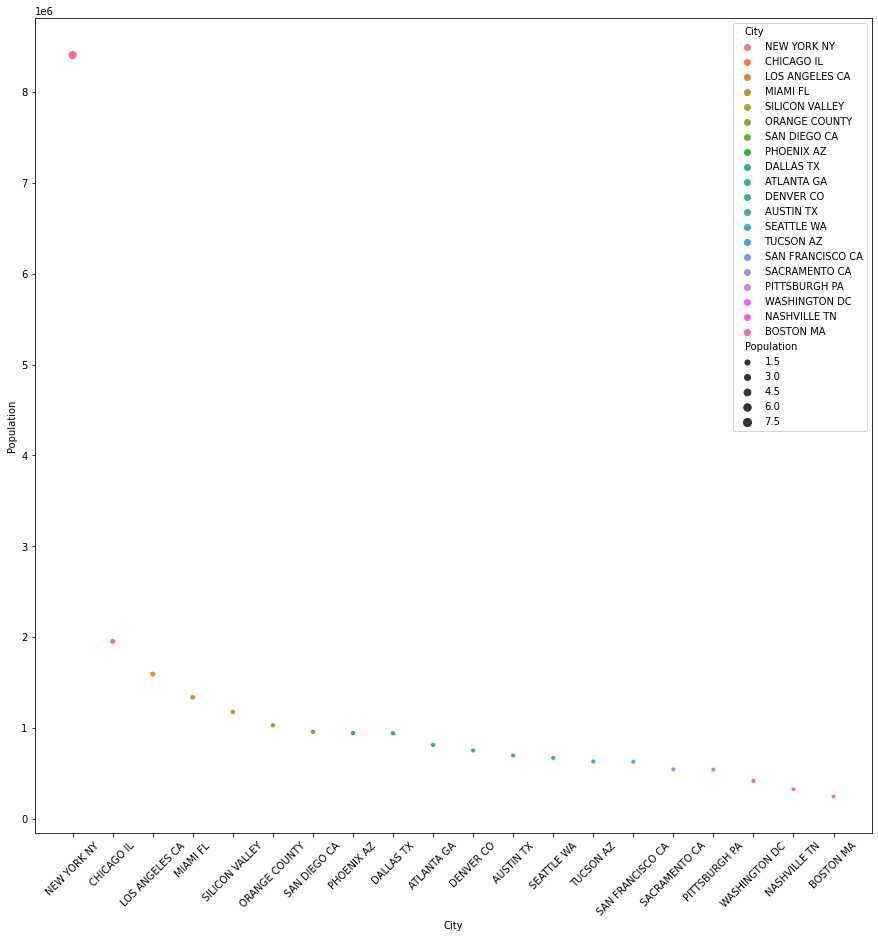

In [29]:
City.sort_values(by=['Population', 'Users'])
sns.scatterplot(data=City, x="City", y="Population", hue="City", size="Population")
plt.xticks(rotation=45)

### outlier removal

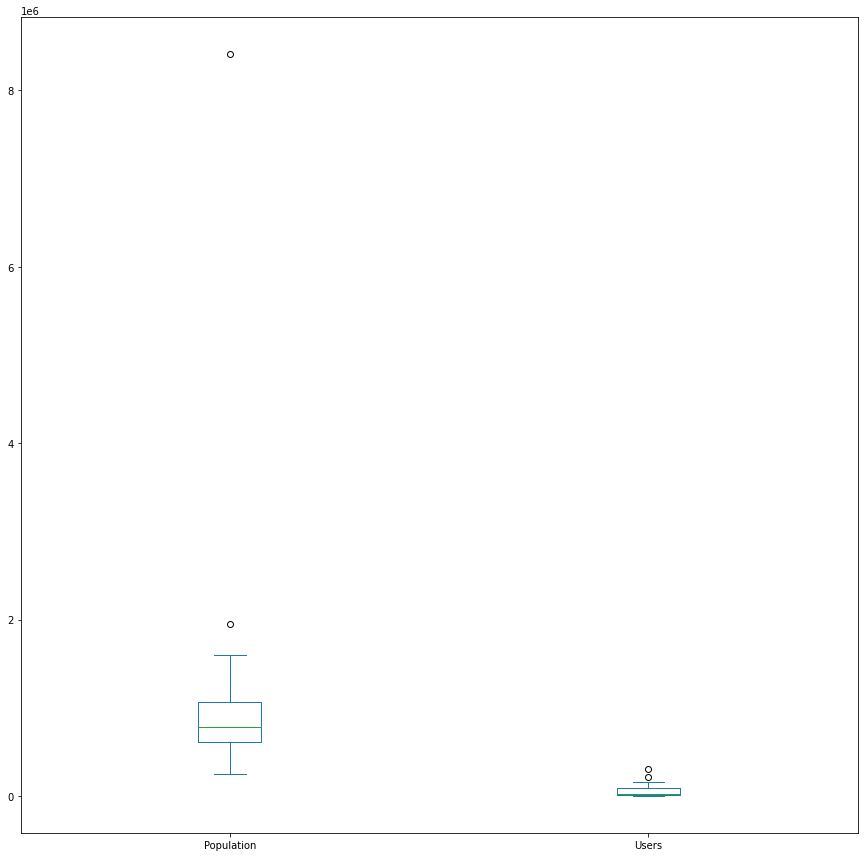

In [30]:
City_outliers = City[["Population", "Users"]]
City_outliers
City_outliers.plot(kind='box')
plt.show()



### EDA FOR CUSTOMER DATA

In [31]:
Customer

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28.0,10813
1,27703,Male,27.0,9237
2,28712,Male,53.0,11242
3,28020,Male,23.0,23327
4,27182,Male,33.0,8536
...,...,...,...,...
49166,12490,Male,33.0,18713
49167,14971,Male,30.0,15346
49168,41414,Male,38.0,3960
49169,41677,Male,23.0,19454


In [32]:
ds.structdata.describe(Customer)

First five data points


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28.0,10813
1,27703,Male,27.0,9237
2,28712,Male,53.0,11242
3,28020,Male,23.0,23327
4,27182,Male,33.0,8536




Random five data points


,Customer ID,Gender,Age,Income (USD/Month)
16606,52872,Female,31.0,22863
10746,52516,Female,47.0,22098
23972,34385,Male,52.0,20158
11291,5454,Male,33.0,19972
35532,39785,Female,27.0,2746




Last five data points


,Customer ID,Gender,Age,Income (USD/Month)
49166,12490,Male,33.0,18713
49167,14971,Male,30.0,15346
49168,41414,Male,38.0,3960
49169,41677,Male,23.0,19454
49170,39761,Female,32.0,10128




Shape of  data set: (49171, 4)


Size of  data set: 196684


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
Customer ID,int64
Gender,object
Age,float64
Income (USD/Month),int64




Numerical Features in Data set
['Customer ID', 'Age', 'Income (USD/Month)']


Categorical Features in Data set


['Gender']



Statistical Description of Columns


,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000




Description of Categorical Features


,count,unique,top,freq
Gender,49171,2,Male,26562




Unique class Count of Categorical features


,Feature,Unique Count
0,Gender,2




Missing Values in Data


,features,missing_counts,missing_percent
0,Customer ID,0,0.0
1,Gender,0,0.0
2,Age,0,0.0
3,Income (USD/Month),0,0.0


In [33]:
Customer.tail()

,Customer ID,Gender,Age,Income (USD/Month)
49166,12490,Male,33.0,18713
49167,14971,Male,30.0,15346
49168,41414,Male,38.0,3960
49169,41677,Male,23.0,19454
49170,39761,Female,32.0,10128


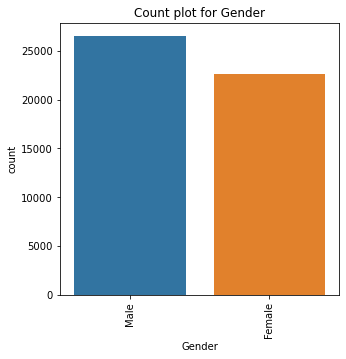

In [34]:
ds.visualizations.countplot(Customer)

### outlier removal

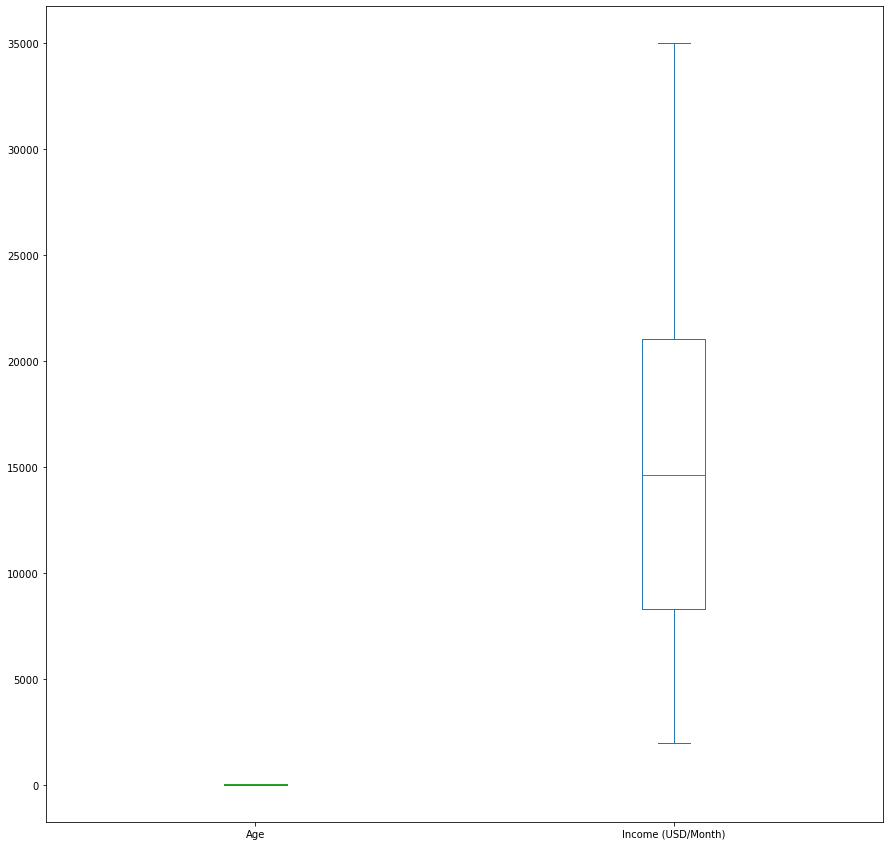

In [35]:
Customer_outliers = Customer[["Age", "Income (USD/Month)"]]
Customer_outliers
Customer_outliers.plot(kind='box')
plt.show()



## EDA FOR TRANSACTION

In [36]:
Transaction

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [37]:
ds.structdata.describe(Transaction)

First five data points


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card




Random five data points


,Transaction ID,Customer ID,Payment_Mode
64813,10064824,42385,Card
203933,10203944,7179,Card
125443,10125454,57818,Card
82581,10082592,51050,Cash
56592,10056603,24664,Card




Last five data points


,Transaction ID,Customer ID,Payment_Mode
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card
440097,10440108,51587,Card




Shape of  data set: (440098, 3)


Size of  data set: 1320294


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
Transaction ID,int64
Customer ID,int64
Payment_Mode,object




Numerical Features in Data set
['Transaction ID', 'Customer ID']


Categorical Features in Data set


['Payment_Mode']



Statistical Description of Columns


,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000




Description of Categorical Features


,count,unique,top,freq
Payment_Mode,440098,2,Card,263991




Unique class Count of Categorical features


,Feature,Unique Count
0,Payment_Mode,2




Missing Values in Data


,features,missing_counts,missing_percent
0,Transaction ID,0,0.0
1,Customer ID,0,0.0
2,Payment_Mode,0,0.0


In [38]:
Transaction.tail()

,Transaction ID,Customer ID,Payment_Mode
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card
440097,10440108,51587,Card


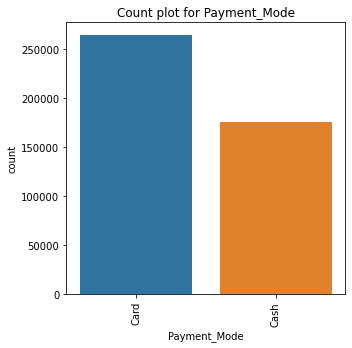

In [39]:
ds.visualizations.countplot(Transaction)

In [40]:
Cab


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [41]:
City


,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247
5,ORANGE COUNTY,1030185,12994
6,SAN DIEGO CA,959307,69995
7,PHOENIX AZ,943999,6133
8,DALLAS TX,942908,22157
9,ATLANTA GA,814885,24701


In [42]:
Customer


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28.0,10813
1,27703,Male,27.0,9237
2,28712,Male,53.0,11242
3,28020,Male,23.0,23327
4,27182,Male,33.0,8536
...,...,...,...,...
49166,12490,Male,33.0,18713
49167,14971,Male,30.0,15346
49168,41414,Male,38.0,3960
49169,41677,Male,23.0,19454


In [43]:
Transaction

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [44]:
Cab_Transaction = pd.merge(Cab, Transaction)
Cab_Transaction

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card
...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card


In [45]:
#Merging Cab, Transaaction and Customer dataframes
City_Customer = pd.merge(Cab_Transaction, Customer)
City_Customer

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28.0,10813
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28.0,10813
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28.0,10813
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27.0,9237
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27.0,9237
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,2018-01-07,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,38520,Card,Female,42.0,19417
359388,10439799,2018-01-03,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,12490,Cash,Male,33.0,18713
359389,10439838,2018-01-04,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,41414,Card,Male,38.0,3960
359390,10439840,2018-01-06,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,41677,Cash,Male,23.0,19454


In [46]:
#Merging Cab, Transaaction, City and Customer dataframes
Final = pd.merge(City_Customer, City)
Final


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28.0,10813,814885,24701
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28.0,10813,814885,24701
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28.0,10813,814885,24701
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27.0,9237,814885,24701
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27.0,9237,814885,24701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,2018-03-03,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29.0,6829,418859,127001
359388,10319775,2018-04-13,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29.0,6829,418859,127001
359389,10347676,2018-07-06,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29.0,6829,418859,127001
359390,10358624,2018-08-02,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29.0,6829,418859,127001


### EDA FOR THE FINAL DATAFRAME

In [47]:
ds.structdata.describe(Final)

First five data points


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28.0,10813,814885,24701
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28.0,10813,814885,24701
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28.0,10813,814885,24701
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27.0,9237,814885,24701
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27.0,9237,814885,24701




Random five data points


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
78993,10034769,2016-05-22,Yellow Cab,CHICAGO IL,18.90,300.10,235.8720,3609,Card,Female,19.0,3206,1955130,164468
13552,10124088,2016-12-25,Pink Cab,BOSTON MA,10.45,172.77,120.1750,58228,Card,Male,63.0,24694,248968,80021
34460,10057364,2016-07-29,Yellow Cab,BOSTON MA,29.12,439.15,415.8336,59116,Cash,Male,46.0,11281,248968,80021
138102,10023099,2016-04-06,Yellow Cab,LOS ANGELES CA,29.75,651.06,360.5700,7275,Cash,Male,25.0,3026,1595037,144132
248596,10224606,2017-09-18,Yellow Cab,NEW YORK NY,39.78,998.90,568.0584,980,Card,Female,36.0,16103,8405837,302149




Last five data points


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
359387,10307228,2018-03-03,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29.0,6829,418859,127001
359388,10319775,2018-04-13,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29.0,6829,418859,127001
359389,10347676,2018-07-06,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29.0,6829,418859,127001
359390,10358624,2018-08-02,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29.0,6829,418859,127001
359391,10370709,2018-08-30,Yellow Cab,WASHINGTON DC,34.24,453.11,427.3152,51406,Card,Female,29.0,6829,418859,127001




Shape of  data set: (359392, 14)


Size of  data set: 5031488


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
Transaction ID,int64
Date of Travel,datetime64[ns]
Company,object
City,object
KM Travelled,float64
Price Charged,float64
Cost of Trip,float64
Customer ID,int64
Payment_Mode,object
Gender,object




Column(s) {'Date of Travel'} should be in Datetime format. Use the [to_date] function in datasist.feature_engineering to convert to Pandas Datetime format


Numerical Features in Data set
['Transaction ID', 'KM Travelled', 'Price Charged', 'Cost of Trip', 'Customer ID', 'Age', 'Income (USD/Month)', 'Population', 'Users']


Categorical Features in Data set


['Company', 'City', 'Payment_Mode', 'Gender']



Statistical Description of Columns


,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Population,Users
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937,3.132198e+06,158365.582267
std,1.268058e+05,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482,3.315194e+06,100850.051020
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000,2.489680e+05,3643.000000
25%,1.011081e+07,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000,6.712380e+05,80021.000000
50%,1.022104e+07,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000,1.595037e+06,144132.000000
75%,1.033094e+07,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000,8.405837e+06,302149.000000
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000,8.405837e+06,302149.000000




Description of Categorical Features


,count,unique,top,freq
Company,359392,2,Yellow Cab,274681
City,359392,19,NEW YORK NY,99885
Payment_Mode,359392,2,Card,215504
Gender,359392,2,Male,205912




Unique class Count of Categorical features


,Feature,Unique Count
0,Company,2
1,City,19
2,Payment_Mode,2
3,Gender,2




Missing Values in Data


,features,missing_counts,missing_percent
0,Transaction ID,0,0.0
1,Date of Travel,0,0.0
2,Company,0,0.0
3,City,0,0.0
4,KM Travelled,0,0.0
5,Price Charged,0,0.0
6,Cost of Trip,0,0.0
7,Customer ID,0,0.0
8,Payment_Mode,0,0.0
9,Gender,0,0.0


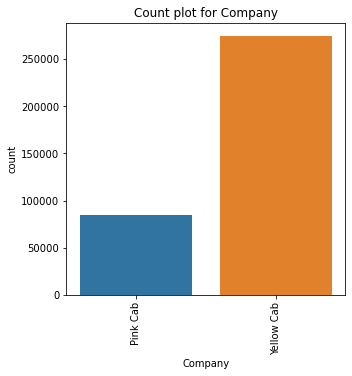

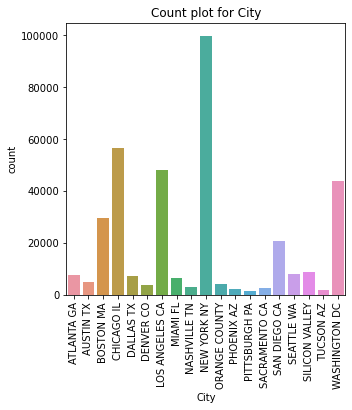

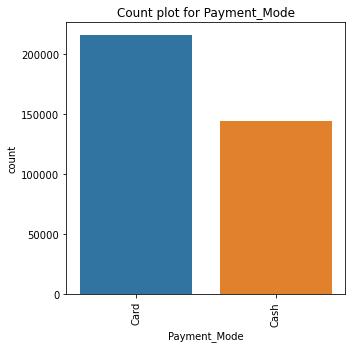

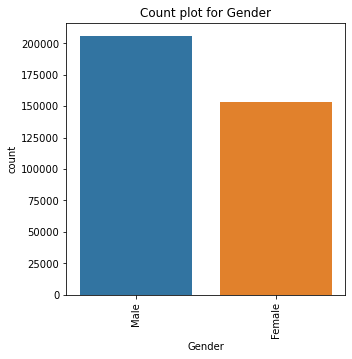

In [48]:
ds.visualizations.countplot(Final)

### splitting into the two cab companies

In [49]:
Pink_Cab = Final.loc[Final['Company'] == "Pink Cab"]
Pink_Cab

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28.0,10813,814885,24701
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27.0,9237,814885,24701
6,10395626,2018-10-27,Pink Cab,ATLANTA GA,13.39,167.03,141.934,27703,Card,Male,27.0,9237,814885,24701
7,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53.0,11242,814885,24701
11,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23.0,23327,814885,24701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359332,10200082,2017-07-23,Pink Cab,WASHINGTON DC,20.23,347.58,218.484,52425,Cash,Male,58.0,10737,418859,127001
359346,10262863,2017-11-19,Pink Cab,WASHINGTON DC,4.44,61.95,50.616,51257,Card,Male,39.0,15247,418859,127001
359356,10417014,2018-12-02,Pink Cab,WASHINGTON DC,40.95,565.07,434.070,51257,Card,Male,39.0,15247,418859,127001
359358,10197277,2017-07-23,Pink Cab,WASHINGTON DC,32.64,375.27,368.832,51510,Card,Female,18.0,6855,418859,127001


In [50]:
Yellow_Cab = Final.loc[Final['Company'] == "Yellow Cab"]
Yellow_Cab

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28.0,10813,814885,24701
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28.0,10813,814885,24701
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27.0,9237,814885,24701
5,10324737,2018-05-04,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27.0,9237,814885,24701
8,10079404,2016-09-21,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53.0,11242,814885,24701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,2018-03-03,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29.0,6829,418859,127001
359388,10319775,2018-04-13,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29.0,6829,418859,127001
359389,10347676,2018-07-06,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29.0,6829,418859,127001
359390,10358624,2018-08-02,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29.0,6829,418859,127001


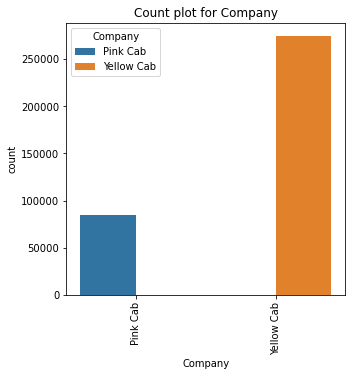

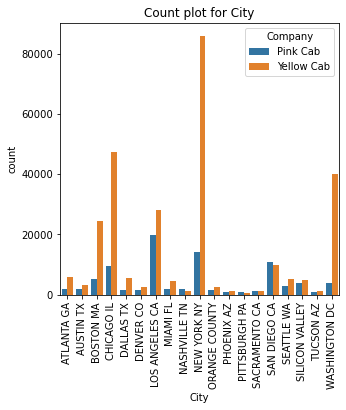

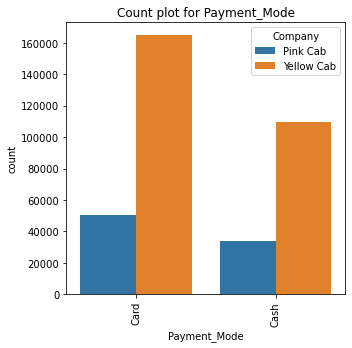

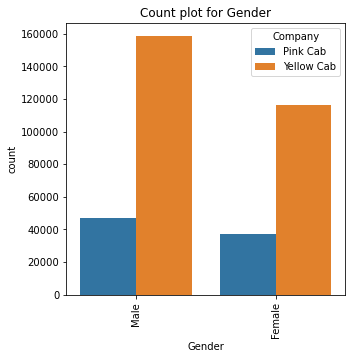

In [51]:
ds.visualizations.countplot(Final, separate_by='Company')

In [52]:
#Calculating per capita patronage in each city
Final["Per capita patronage"] = (
    Final["Users"] / Final["Population"]
)
Final.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Per capita patronage
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28.0,10813,814885,24701,0.030312
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28.0,10813,814885,24701,0.030312
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28.0,10813,814885,24701,0.030312
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27.0,9237,814885,24701,0.030312
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27.0,9237,814885,24701,0.030312


In [53]:
Most_popular_city=Final[["City", "Per capita patronage"]]
Most_popular_city



,City,Per capita patronage
0,ATLANTA GA,0.030312
1,ATLANTA GA,0.030312
2,ATLANTA GA,0.030312
3,ATLANTA GA,0.030312
4,ATLANTA GA,0.030312
...,...,...
359387,WASHINGTON DC,0.303207
359388,WASHINGTON DC,0.303207
359389,WASHINGTON DC,0.303207
359390,WASHINGTON DC,0.303207


<Figure size 1656x1656 with 0 Axes>

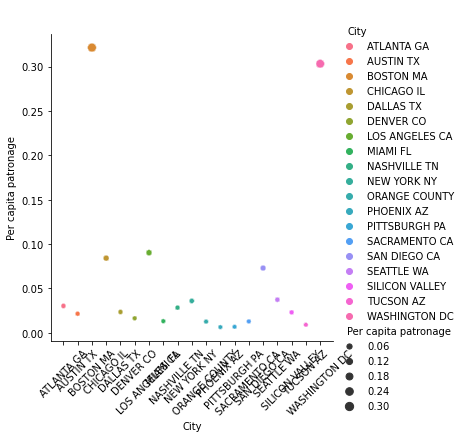

In [54]:
plt.figure(figsize=(23, 23))

sns.relplot(data=Most_popular_city, x="City", y="Per capita patronage", hue="City", size="Per capita patronage")
plt.xticks(rotation=45)
plt.show()

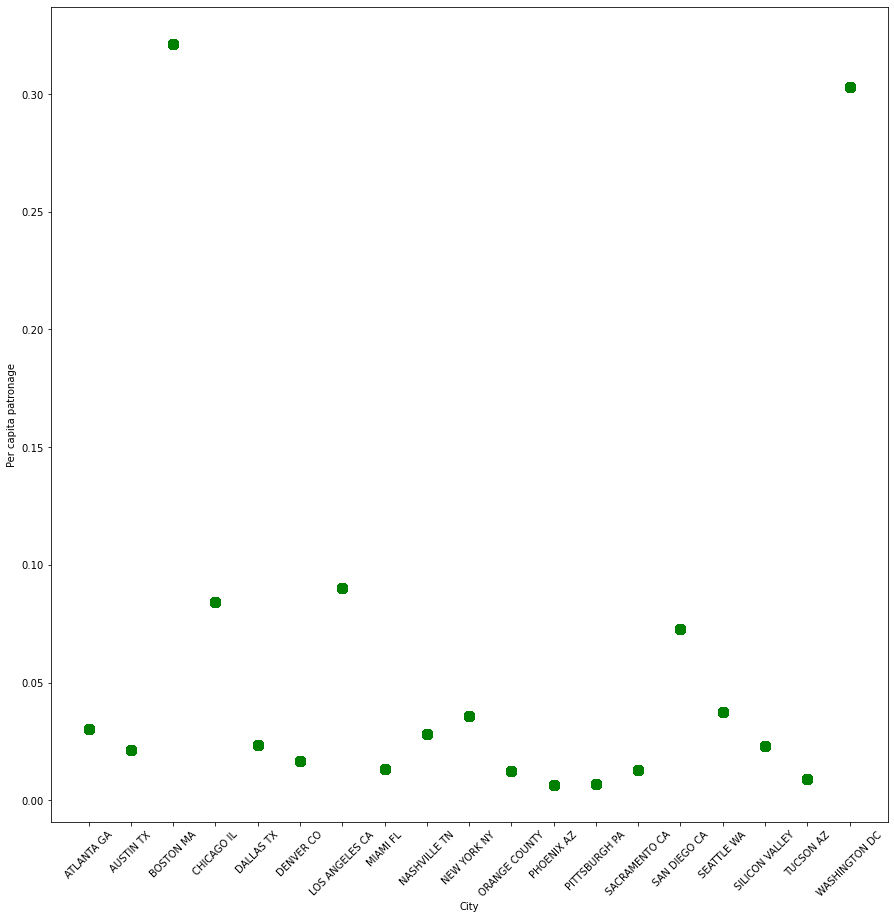

In [55]:
Most_popular_city.plot.scatter(x = 'City', y = 'Per capita patronage', s = 100, c = 'green')
plt.xticks(rotation=45)
plt.show()

### General Observations that can influence further analysis

In the time period considered,
1. There was more patronage of the Yellow Cab and why?
    some hypotheses:
<ul>
        <li>a. It is cheaper</li>
        <li>b. It is used in more populous cities</li>
</ul>
2. New York has the most patronage and why?(but does it translate to per capita patronage? no it doesn't...Boston and    
   Washington DC have the most patronage of the two cabs per capita);<br>
    some hypotheses:
<ul>
        <li>a. New York is the most populous city</li>
        <li>b. patronage per capita may show that New York only has heavy patronage in sheer numbers</li>
    <li><i> Investigate the outliers </i> </li>
</ul>

                     

3. Customers preferred using their cards to pay as opposed to cash and why is that?<br>
    some hypotheses:
<ul>
     <li> a. it is simply out of convenience</li>
     <li> b. it is cheaper to use cards instead of Cash (also investigate along City lines to see if there is a pattern there)</li>
</ul>

## Hypotheses

# Hypothesis 1

There is more patronage of Yellow Cab due to its cheaper cost

In [56]:
#calculate the average price of yellow cab vs average price of Pink cab(Using price charged column)
Yellow_Avg_price=round(Yellow_Cab['Price Charged'].mean())
print("Approximated Average price charged for the Yellow Cab is",Yellow_Avg_price)

Approximated Average price charged for the Yellow Cab is 458


In [57]:
Pink_Avg_price=round(Pink_Cab['Price Charged'].mean())
print("Approximated Average price charged for the Pink Cab is", Pink_Avg_price)

Approximated Average price charged for the Pink Cab is 311


on average, the Pink cabs are are cheaper according to price charged. This somewhat disproves the initial hypothesis
next check the average costs of trips

In [58]:
Yellow_Avg_cost=round(Yellow_Cab['Cost of Trip'].mean())
print("Approximated Average cost for the Yellow Cab is",Yellow_Avg_cost)

Approximated Average cost for the Yellow Cab is 298


In [59]:
Yellow_Avg_cost=round(Yellow_Cab['Cost of Trip'].mean())
print("Approximated Average cost for the Yellow Cab is",Yellow_Avg_cost)

Approximated Average cost for the Yellow Cab is 298


In [60]:
Pink_Avg_cost=round(Pink_Cab['Cost of Trip'].mean())
print("Approximated Average cost for the Pink Cab is", Pink_Avg_cost)

Approximated Average cost for the Pink Cab is 248


using the cost of trips, the Yellow cab's is still is higher than that of the pink cab and 
overall disproves the hypothesis that the Yellow cabs have more patronage due to lower costs 

# Hypothesis 2

There is more patronage of Yellow Cab due to its use in the more populous cities

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'ATLANTA GA'),
  Text(1, 0, 'AUSTIN TX'),
  Text(2, 0, 'BOSTON MA'),
  Text(3, 0, 'CHICAGO IL'),
  Text(4, 0, 'DALLAS TX'),
  Text(5, 0, 'DENVER CO'),
  Text(6, 0, 'LOS ANGELES CA'),
  Text(7, 0, 'MIAMI FL'),
  Text(8, 0, 'NASHVILLE TN'),
  Text(9, 0, 'NEW YORK NY'),
  Text(10, 0, 'ORANGE COUNTY'),
  Text(11, 0, 'PHOENIX AZ'),
  Text(12, 0, 'PITTSBURGH PA'),
  Text(13, 0, 'SACRAMENTO CA'),
  Text(14, 0, 'SAN DIEGO CA'),
  Text(15, 0, 'SEATTLE WA'),
  Text(16, 0, 'SILICON VALLEY'),
  Text(17, 0, 'TUCSON AZ'),
  Text(18, 0, 'WASHINGTON DC')])

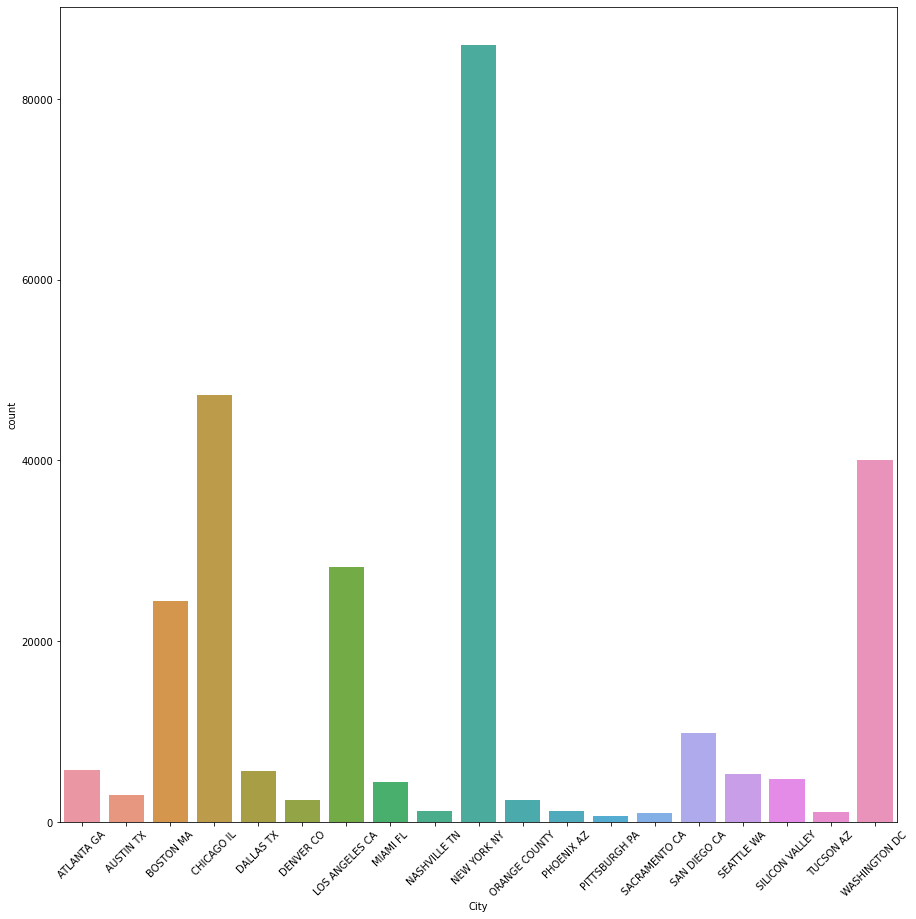

In [61]:
sns.countplot(x ='City', data = Yellow_Cab)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'ATLANTA GA'),
  Text(1, 0, 'AUSTIN TX'),
  Text(2, 0, 'BOSTON MA'),
  Text(3, 0, 'CHICAGO IL'),
  Text(4, 0, 'DALLAS TX'),
  Text(5, 0, 'DENVER CO'),
  Text(6, 0, 'LOS ANGELES CA'),
  Text(7, 0, 'MIAMI FL'),
  Text(8, 0, 'NASHVILLE TN'),
  Text(9, 0, 'NEW YORK NY'),
  Text(10, 0, 'ORANGE COUNTY'),
  Text(11, 0, 'PHOENIX AZ'),
  Text(12, 0, 'PITTSBURGH PA'),
  Text(13, 0, 'SACRAMENTO CA'),
  Text(14, 0, 'SAN DIEGO CA'),
  Text(15, 0, 'SEATTLE WA'),
  Text(16, 0, 'SILICON VALLEY'),
  Text(17, 0, 'TUCSON AZ'),
  Text(18, 0, 'WASHINGTON DC')])

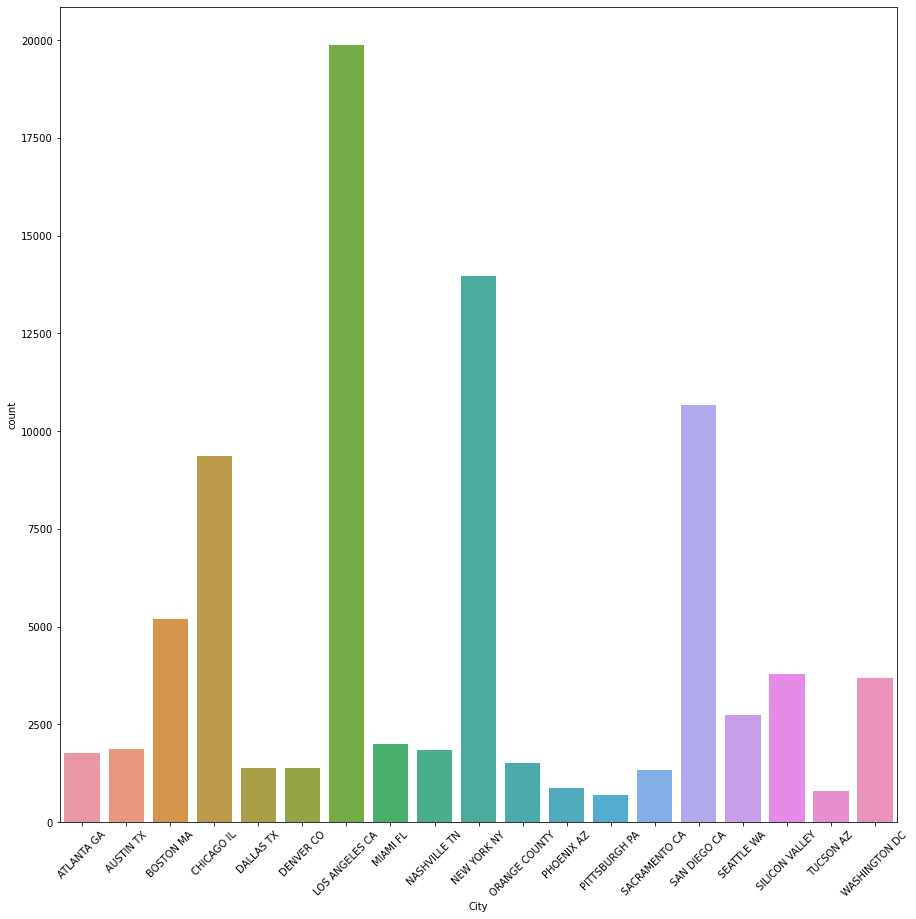

In [62]:
sns.countplot(x ='City', data = Pink_Cab)
plt.xticks(rotation=45)

<b>Yellow cab Top 5 most popular cities</b><br>
<table>
    <tr>New York</tr><br>
    <tr>Chicago</tr><br>
    <tr>Washington DC</tr><br>
    <tr>Los Angeles</tr><br>
    <tr>Boston</tr><br>
    </table>

<strong>Pink cab Top 5 most popular cities</strong><br>
<table>
    <tr>Los Angeles</tr><br>
    <tr>New York</tr><br>
    <tr>San Diego</tr><br>
    <tr>Chicago</tr><br>
    <tr>Boston</tr><br>
    </table>

#### We calculate the total uses of each city where the cabs are the most popular

#### FIRST WE ANALYZE THE YELLOW CAB

In [63]:
Yellow_Cab.loc[Yellow_Cab["City"] == "NEW YORK NY"].head(1)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
167110,10006684,2016-02-05,Yellow Cab,NEW YORK NY,34.34,1099.35,482.1336,2416,Cash,Male,28.0,21399,8405837,302149


In [64]:
Yellow_Cab.loc[Yellow_Cab['City'] == "CHICAGO IL"].head(1)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
42146,10001838,2016-01-09,Yellow Cab,CHICAGO IL,6.48,150.6,90.2016,3077,Card,Male,22.0,16759,1955130,164468


In [65]:
Yellow_Cab.loc[Yellow_Cab["City"] == "WASHINGTON DC"].head(1)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
315656,10066690,2016-08-17,Yellow Cab,WASHINGTON DC,31.59,447.75,416.988,51779,Card,Male,28.0,7138,418859,127001


In [66]:
Yellow_Cab.loc[Yellow_Cab["City"] == "LOS ANGELES CA"].head(1)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
109613,10039340,2016-06-03,Yellow Cab,LOS ANGELES CA,15.54,297.84,186.48,8693,Card,Male,21.0,15024,1595037,144132


In [67]:
Yellow_Cab.loc[Yellow_Cab["City"] == "BOSTON MA"].head(1)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
12454,10020699,2016-04-04,Yellow Cab,BOSTON MA,30.42,391.37,368.6904,59799,Card,Male,33.0,19271,248968,80021


#### NEXT WE ANALYZE THE PINK CAB

In [68]:
Pink_Cab.loc[Pink_Cab["City"] == "LOS ANGELES CA"].head(1)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
109612,10000074,2016-01-02,Pink Cab,LOS ANGELES CA,46.0,997.84,542.8,8693,Card,Male,21.0,15024,1595037,144132


In [69]:
Pink_Cab.loc[Pink_Cab["City"] == "NEW YORK NY"].head(1)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
167109,10000139,2016-01-08,Pink Cab,NEW YORK NY,17.85,242.9,198.135,2416,Cash,Male,28.0,21399,8405837,302149


In [70]:
Pink_Cab.loc[Pink_Cab["City"] == "SAN DIEGO CA"].head(1)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
276720,10000170,2016-01-03,Pink Cab,SAN DIEGO CA,10.8,230.34,115.56,20330,Cash,Male,53.0,28591,959307,69995


In [71]:
Pink_Cab.loc[Pink_Cab['City'] == "CHICAGO IL"].head(1)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
42145,10000034,2016-01-03,Pink Cab,CHICAGO IL,23.2,396.73,278.4,3077,Cash,Male,22.0,16759,1955130,164468


In [72]:
Pink_Cab.loc[Pink_Cab['City'] == "BOSTON MA"].head(1)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
12453,10000019,2016-01-12,Pink Cab,BOSTON MA,14.4,191.61,146.88,59799,Cash,Male,33.0,19271,248968,80021


The total number of users in the cities(for Yellow Cabs): 817,771<br>
The total number of users in the cities(for Pink Cabs): 760,765

From the analysis above, it seems that the Yellow cabs are more popular due to their use in the more populous cities

# Hypothesis 3

New York has the most patronage due to its population size(it is the most populous city)


# Hypothesis 4

It may not also be the city with the most per capita patronage as we will prove below: San Fransisco is
So the sheer population of New York may not be the reason for the high patronage of the cab services

In [73]:
#Calculating per capita patronage in each city
City["Per capita patronage"] = (
    City["Users"] / City["Population"]
)
City.sort_values(by=['Per capita patronage'], ascending=False)

,City,Population,Users,Per capita patronage
14,SAN FRANCISCO CA,629591,213609,0.339282
19,BOSTON MA,248968,80021,0.321411
17,WASHINGTON DC,418859,127001,0.303207
2,LOS ANGELES CA,1595037,144132,0.090363
1,CHICAGO IL,1955130,164468,0.084121
6,SAN DIEGO CA,959307,69995,0.072964
12,SEATTLE WA,671238,25063,0.037338
0,NEW YORK NY,8405837,302149,0.035945
9,ATLANTA GA,814885,24701,0.030312
18,NASHVILLE TN,327225,9270,0.028329


# Hypothesis 5

Customers preferred to use their cards as opposed to cash because it is cheaper to use

we compare the payments using cash as opposed to payments using cards

In [74]:
Final

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Per capita patronage
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28.0,10813,814885,24701,0.030312
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28.0,10813,814885,24701,0.030312
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28.0,10813,814885,24701,0.030312
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27.0,9237,814885,24701,0.030312
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27.0,9237,814885,24701,0.030312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,2018-03-03,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29.0,6829,418859,127001,0.303207
359388,10319775,2018-04-13,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29.0,6829,418859,127001,0.303207
359389,10347676,2018-07-06,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29.0,6829,418859,127001,0.303207
359390,10358624,2018-08-02,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29.0,6829,418859,127001,0.303207


In [75]:
Cash = Final.loc[Final['Payment_Mode'] == "Cash"]
Cash

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Per capita patronage
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28.0,10813,814885,24701,0.030312
5,10324737,2018-05-04,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27.0,9237,814885,24701,0.030312
7,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53.0,11242,814885,24701,0.030312
10,10320493,2018-04-21,Yellow Cab,ATLANTA GA,19.38,326.35,272.0952,28712,Cash,Male,53.0,11242,814885,24701,0.030312
11,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23.0,23327,814885,24701,0.030312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359385,10439949,2018-01-02,Yellow Cab,WASHINGTON DC,34.80,507.12,484.4160,52614,Cash,Female,44.0,8303,418859,127001,0.303207
359386,10284072,2017-12-17,Yellow Cab,WASHINGTON DC,44.00,679.97,607.2000,51406,Cash,Female,29.0,6829,418859,127001,0.303207
359387,10307228,2018-03-03,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29.0,6829,418859,127001,0.303207
359388,10319775,2018-04-13,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29.0,6829,418859,127001,0.303207


In [76]:
Card = Final.loc[Final['Payment_Mode'] == "Card"]
Card

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Per capita patronage
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28.0,10813,814885,24701,0.030312
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28.0,10813,814885,24701,0.030312
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27.0,9237,814885,24701,0.030312
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27.0,9237,814885,24701,0.030312
6,10395626,2018-10-27,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,27703,Card,Male,27.0,9237,814885,24701,0.030312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359382,10388121,2018-10-04,Yellow Cab,WASHINGTON DC,13.56,198.27,172.4832,51078,Card,Male,21.0,8810,418859,127001,0.303207
359383,10274704,2017-12-06,Yellow Cab,WASHINGTON DC,42.80,627.21,559.8240,52614,Card,Female,44.0,8303,418859,127001,0.303207
359384,10311299,2018-03-15,Yellow Cab,WASHINGTON DC,13.56,241.43,165.9744,52614,Card,Female,44.0,8303,418859,127001,0.303207
359389,10347676,2018-07-06,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29.0,6829,418859,127001,0.303207


so we compare them using the averages of the price charged and cost of trip columns

In [77]:
Cash[['Price Charged', 'Cost of Trip']]


,Price Charged,Cost of Trip
1,598.70,317.4228
5,138.40,87.5088
7,125.20,97.6320
10,326.35,272.0952
11,377.40,351.6020
...,...,...
359385,507.12,484.4160
359386,679.97,607.2000
359387,668.93,525.3120
359388,67.60,44.5536


In [78]:
cash_1 =stat.mean(Cash['Price Charged']) - stat.mean(Cash['Cost of Trip'])
round(cash_1, 2)

137.5

In [79]:
Card[['Price Charged', 'Cost of Trip']]


,Price Charged,Cost of Trip
0,370.95,313.6350
2,792.05,597.4020
3,358.52,334.8540
4,721.10,467.1192
6,167.03,141.9340
...,...,...
359382,198.27,172.4832
359383,627.21,559.8240
359384,241.43,165.9744
359389,331.97,337.8240


In [80]:
card_1 =stat.mean(Card['Price Charged']) - stat.mean(Card['Cost of Trip'])
round(card_1, 2)

137.09

there is little to no noticeable difference between the use of cards versus the use of cash when we compare the average cost <br> of trip and average price charged for each of the transaction methods

# Hypothesis 5

so, it may be because of the convenience of using cards as opposed to cash but that will require a sample of the users to give the reasons themselves


# REPORT

This report will highlight the various observations from evaluating each of the datasets provided <br>
<b>Data preparation:</b><br>
View each dataset into individual dataframes and observe the technical structures and prelininary information<br>
    <i>Null values were checked for in all dataframes and there were no null values so I move on to the Exploratory data Analysis</i><br>
    
<b>Cab Data observations:</b> <br>
1. Yellow Cab has overwhelmingly more customers than the Pink Cab with a ratio of 5:3 <br>
2. New York has the total number of customers when the Yellow and Pink Cabs are considered, but broken down by City,<br>
    The Yellow Cab has its highest number of customers in New York while Pink cab has its highest patronage in Los Angeles<br>
    
<b>City Data observations:</b><br>
This is quite straightfoward, New York represents the highest number of Users as well as the largest population<br>

<b>Customer Data observations:</b><br>
1. The average age of the customers is 35 years (Millenials)<br>
2. The average income of the customers is approximately 15,000 dollars<br>
3. More men than women use the cab services with a ratio of about 5:4<br>

<b>Transaction Data observations:</b><br>
1. People overwhlminghly preferred to use cards for payments rather than cash<br>

Aftter merging the files as appropriate as follows:<br>
First merging the cab data with transaction data,<br>
then merging that hybrid data with customer<br>
and then merging the resulting data frame with City.<br>

This merging then informed the postulation of the five hypothesis that have been treated above<br>


<B>RECOMMENDATIONS FOR INVESTMENT</B>
1. It is better to invest in the Yellow Cabs at the moment as opposed to the pink cab due to its popularity and its use in the Most populous city, New York.<br>
2. Encourage card payments for the covenience of both the drivers and the customer. This can be done by applying some sort of discount after a number of payments with cards<br>
3. The marketing for the cab should be aimed at millenials and the male population since they are more likely to use the cab services<br>

   